# Capstone Project - Sao Paulo overview

## Introduction/Business Problem

São Paulo is the largest and most populous Brazilian municipality, capital of a homonymous state and the most influent corporate and financial center of South America. It is a city that welcomes internal immigrants (other cities and states in the country) in addition to foreign communities, thus printing a character multicultural and cosmopolitan city.

In addition, São Paulo is a city that annually receives around 15 million tourists a year, both Brazilian and foreign, who are looking for different experiences in the city.

We will then explore the city and group the localities according to the venues categories most present in each neighborhood.

## Data Sources

In order to build our analysis, three data sources are required:

**1. Postcode, City, Neighborhood**

The 'Great São Paulo' is a vast metropolis, composed of the conurbation of a very large number of municipalities and with a population of approximately 20 million people. There are several levels of organization in the city and countless sub-municipalities, administrative regions and neighborhoods. There are compiled data that lists more than 1500 neighborhoods.

The list used in this work presents the 88 main neighborhoods in the city and was obtained from the website:

https://www.estadosecapitaisdobrasil.com/listas/lista-dos-bairros-de-sao-paulo/

**2. Geospatial data**

All geospatial coordinates were obtained using the geopy package and specifically the data provider ARCGIS, chosen specifically because it does not require the creation of an access key for simple data retrieval (latitude and longitude) of a location.

**3. Foursquare API**

The get method of the 'explore' endpoint will be used in particular, which returns the following information by default:

    - Neighborhood
    - Neighborhood Latitude
    - Neighborhood Longitude
    - Venue
    - Name of the venue e.g. the name of a store or restaurant
    - Venue Latitude
    - Venue Longitude
    - Venue Category

## Methodology

**Part 1 - Recovering, cleaning and organizing data**

In [6]:
import numpy as np
import pandas as pd
import geocoder

In order to speed up the process of loading data from neighborhoods, the list obtained on the website was stored in csv format



In [7]:
df = pd.read_csv('bairros_puro.csv')
df.head()

,Bairro
0,Água Rasa‎
1,Alto de Pinheiros‎
2,Anhanguera‎
3,Aricanduva‎
4,Artur Alvim‎


Like many languages ​​of Latin origin, Portuguese uses a considerable set of special characters. All were removed to avoid treatment failures and subsequent visualization.

In [8]:
from unicodedata import normalize
def removeSpecialChar (text) :
		return normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

In [9]:
df['Bairro'] = df['Bairro'].apply(removeSpecialChar)
df.rename(columns={'Bairro':'Neighborhood'}, inplace=True)
df.head()

,Neighborhood
0,Agua Rasa
1,Alto de Pinheiros
2,Anhanguera
3,Aricanduva
4,Artur Alvim


Function created to facilitate the call to API providing geospatial data.

In [10]:
def get_latlgn(Neighborhood):
    g = geocoder.arcgis('{}, Sao Paulo, BR'.format(Neighborhood))
    return g.latlng

In [11]:
aux_dict = {}
count = 1
df_size = len(df['Neighborhood'])
for elem in df['Neighborhood']:
    aux_dict[elem] = get_latlgn(elem)
    print('{} : done - {}/{}'.format(elem, count, df_size))
    count += 1

Agua Rasa : done - 1/88
Alto de Pinheiros : done - 2/88
Anhanguera : done - 3/88
Aricanduva : done - 4/88
Artur Alvim : done - 5/88
Barra Funda : done - 6/88
Bela Vista : done - 7/88
Belem : done - 8/88
Bom Retiro : done - 9/88
Brasilandia : done - 10/88
Butanta : done - 11/88
Cachoeirinha : done - 12/88
Cambuci : done - 13/88
Campo Belo : done - 14/88
Campo Grande : done - 15/88
Campo Limpo : done - 16/88
Cangaiba : done - 17/88
Capao Redondo : done - 18/88
Carrao : done - 19/88
Casa Verde : done - 20/88
Cidade Ademar : done - 21/88
Cidade Dutra : done - 22/88
Cidade Lider : done - 23/88
Cidade Tiradentes : done - 24/88
Consolacao : done - 25/88
Cursino : done - 26/88
Ermelino Matarazzo : done - 27/88
Freguesia do O : done - 28/88
Grajau : done - 29/88
Guaianases : done - 30/88
Iguatemi : done - 31/88
Ipiranga : done - 32/88
Itaim Bibi : done - 33/88
Itaim Paulista : done - 34/88
Itaquera : done - 35/88
Jabaquara : done - 36/88
Jacana : done - 37/88
Jaguara : done - 38/88
Jaguare : do

Creation of a new dataframe with data from the Geospatial API:

In [12]:
df_geolocation = pd.DataFrame.from_dict(aux_dict, orient = 'index', columns = ['Latitude', 'Longitude'])
df_geolocation.reset_index(inplace = True)
df_geolocation = df_geolocation.rename(columns = {'index':'Neighborhood'})
df_geolocation.head()

,Neighborhood,Latitude,Longitude
0,Agua Rasa,-23.55337,-46.58027
1,Alto de Pinheiros,-23.55273,-46.70916
2,Anhanguera,-23.42097,-46.78517
3,Aricanduva,-23.56771,-46.51025
4,Artur Alvim,-23.55105,-46.48000


Unification of data from dataframes with neighborhood names and their respective geo-coordinates:

In [13]:
df_sp = pd.concat([df,df_geolocation[['Latitude','Longitude']]], axis = 1)
df_sp.head()

,Neighborhood,Latitude,Longitude
0,Agua Rasa,-23.55337,-46.58027
1,Alto de Pinheiros,-23.55273,-46.70916
2,Anhanguera,-23.42097,-46.78517
3,Aricanduva,-23.56771,-46.51025
4,Artur Alvim,-23.55105,-46.48000


In [14]:
print('The dataframe has {} neighbourhoods'.format(len(df_sp['Neighborhood'].unique()),
df_sp.shape[0]))

The dataframe has 88 neighbourhoods


In [15]:
import folium

In [16]:
sp_geolocation = get_latlgn('Sao Paulo')
print('The geographical coordinate of Sao Paulo are {}, {}.'.format(sp_geolocation[0], sp_geolocation[1]))

The geographical coordinate of Sao Paulo are -23.562869999999975, -46.654679999999985.


In [17]:
map_sp = folium.Map(location=[sp_geolocation[0], sp_geolocation[1]], zoom_start = 11)

for lat, lng, neighborhood in zip(df_sp['Latitude'], df_sp['Longitude'], df_sp['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup= label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_sp)
map_sp

Exploring Sao Paulo using Foursquare geo API

In [18]:
import json
import requests
from pandas.io.json import json_normalize # Convert JSON into pandas dataframe

from foursquare_credentials import CLIENT_ID, CLIENT_SECRET

VERSION = '20180605' # API version
LIMIT = 100 # Default API limite value
RADIUS = 500
df_sp['Neighborhood'].unique()

array(['Agua Rasa', 'Alto de Pinheiros', 'Anhanguera', 'Aricanduva',
       'Artur Alvim', 'Barra Funda', 'Bela Vista', 'Belem', 'Bom Retiro',
       'Brasilandia', 'Butanta', 'Cachoeirinha', 'Cambuci', 'Campo Belo',
       'Campo Grande', 'Campo Limpo', 'Cangaiba', 'Capao Redondo',
       'Carrao', 'Casa Verde', 'Cidade Ademar', 'Cidade Dutra',
       'Cidade Lider', 'Cidade Tiradentes', 'Consolacao', 'Cursino',
       'Ermelino Matarazzo', 'Freguesia do O', 'Grajau', 'Guaianases',
       'Iguatemi', 'Ipiranga', 'Itaim Bibi', 'Itaim Paulista', 'Itaquera',
       'Jabaquara', 'Jacana', 'Jaguara', 'Jaguare', 'Jaragua',
       'Jardim Angela', 'Jardim Helena', 'Jardim Paulista',
       'Jardim Sao Luis', 'Lapa', 'Liberdade', 'Limao', 'Mandaqui',
       'Marsilac', 'Moema', 'Mooca', 'Morumbi', 'Pari', 'Parque do Carmo',
       'Penha', 'Perdizes', 'Pinheiros', 'Ponte Rasa', 'Raposo Tavares',
       'Republica', 'Rio Pequeno', 'Sacoma', 'Santa Cecilia', 'Santana',
       'Santo Amaro', 'Sa

The function below was provided by the IBM DataScience course to process FourSquare API venues requests:

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
sp_venues = getNearbyVenues(df_sp['Neighborhood'], df_sp['Latitude'], df_sp['Longitude'])

Agua Rasa
Alto de Pinheiros
Anhanguera
Aricanduva
Artur Alvim
Barra Funda
Bela Vista
Belem
Bom Retiro
Brasilandia
Butanta
Cachoeirinha
Cambuci
Campo Belo
Campo Grande
Campo Limpo
Cangaiba
Capao Redondo
Carrao
Casa Verde
Cidade Ademar
Cidade Dutra
Cidade Lider
Cidade Tiradentes
Consolacao
Cursino
Ermelino Matarazzo
Freguesia do O
Grajau
Guaianases
Iguatemi
Ipiranga
Itaim Bibi
Itaim Paulista
Itaquera
Jabaquara
Jacana
Jaguara
Jaguare
Jaragua
Jardim Angela
Jardim Helena
Jardim Paulista
Jardim Sao Luis
Lapa
Liberdade
Limao
Mandaqui
Marsilac
Moema
Mooca
Morumbi
Pari
Parque do Carmo
Penha
Perdizes
Pinheiros
Ponte Rasa
Raposo Tavares
Republica
Rio Pequeno
Sacoma
Santa Cecilia
Santana
Santo Amaro
Sao Domingos
Sao Lucas
Sao Mateus
Sao Miguel Paulista
Sao Rafael
Sapopemba
Saude
Se
Tatuape
Tremembe
Tucuruvi
Vila Andrade
Vila Curuca
Vila Formosa
Vila Guilherme
Vila Jacui
Vila Leopoldina
Vila Maria
Vila Mariana
Vila Matilde
Vila Medeiros
Vila Prudente
Vila Sonia


In [21]:
print(sp_venues.shape)
sp_venues.head()

(2319, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agua Rasa,-23.55337,-46.58027,Padaria Carillo,-23.553214,-46.578554,Bakery
1,Agua Rasa,-23.55337,-46.58027,Portuga Bar e Restaurante,-23.553846,-46.579573,Brazilian Restaurant
2,Agua Rasa,-23.55337,-46.58027,Chama Supermercados,-23.554178,-46.581120,Market
3,Agua Rasa,-23.55337,-46.58027,Bona's Carnes,-23.552434,-46.583091,Steakhouse
4,Agua Rasa,-23.55337,-46.58027,Padaria Santa Branca,-23.553953,-46.583706,Bakery


Counting the number of venues per neighborhood:

In [22]:
sp_venues.groupby(by='Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agua Rasa,24,24,24,24,24,24
Alto de Pinheiros,22,22,22,22,22,22
Anhanguera,3,3,3,3,3,3
Aricanduva,12,12,12,12,12,12
Artur Alvim,10,10,10,10,10,10
...,...,...,...,...,...,...
Vila Mariana,51,51,51,51,51,51
Vila Matilde,34,34,34,34,34,34
Vila Medeiros,24,24,24,24,24,24


In [23]:
print('There are {} uniques categories.'.format(len(sp_venues['Venue Category'].unique())))

There are 265 uniques categories.


**Prepare the dataset for the clustering algorithm**

In [24]:
# Applying one hot encoding
sp_onehot = pd.get_dummies(sp_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighbourdhood back to dataframe
sp_onehot['Neighborhood'] = sp_venues['Neighborhood']

# move neighborhood column to first column
fixed_columns = ['Neighborhood'] +[col for col in sp_onehot.columns if col != 'Neighborhood' ]
sp_onehot = sp_onehot[fixed_columns]

sp_onehot.head()

,Neighborhood,Acai House,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Agua Rasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agua Rasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agua Rasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agua Rasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agua Rasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
sp_onehot.shape

(2319, 266)

In [26]:
sp_grouped = sp_onehot.groupby('Neighborhood').mean().reset_index()
sp_grouped.head(10)

,Neighborhood,Acai House,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Agua Rasa,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Alto de Pinheiros,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,Anhanguera,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Aricanduva,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Artur Alvim,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
5,Barra Funda,0.0,0.0,0.0,0.0,0.0,0.012195,0.0,0.0,0.012195,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,Belem,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,Bom Retiro,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.027027,0.027027,0.0,0.0,0.0,0.054054,0.0,0.0
8,Brasilandia,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9,Butanta,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


The code below was provided by the IBM Data Science course to identify the 10 most common types of venues in each neighborhood:

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
# Identifying the top 10 most common venues 
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sp_grouped['Neighborhood']

for ind in np.arange(sp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agua Rasa,Farmers Market,Brazilian Restaurant,Bakery,Furniture / Home Store,Brewery,Restaurant,Market,Steakhouse,Burger Joint,Optical Shop
1,Alto de Pinheiros,Plaza,Convenience Store,Pharmacy,Flea Market,Dance Studio,Bar,Supermarket,Arts & Crafts Store,IT Services,Café
2,Anhanguera,Brazilian Restaurant,Lake,Restaurant,Zoo,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market
3,Aricanduva,Gym / Fitness Center,Plaza,Food & Drink Shop,Grocery Store,Brazilian Restaurant,Fast Food Restaurant,Bank,Bakery,Dessert Shop,Pet Store
4,Artur Alvim,Pharmacy,Bakery,Pizza Place,Food Truck,Farmers Market,Supermarket,Flower Shop,Flea Market,Farm,Fast Food Restaurant


### Clustering Neighborhoods
Let's run the k-mean to cluster the neighborhood into 3 cluster

In [29]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [30]:
sp_grouped_clustering_aux = sp_grouped.copy(deep=True)
sp_grouped_clustering = sp_grouped.drop('Neighborhood',1)
sp_grouped_clustering.head()

,Acai House,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,...,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# set number of clusters
kclusters = 4

# run k-mens clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(sp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30]

array([1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 3, 1, 1], dtype=int32)

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sp_merged = df_sp

#merge sp_grouped with df_sp to add latitude, longitude for each neighborhood

sp_merged = sp_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

sp_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agua Rasa,-23.55337,-46.58027,1.0,Farmers Market,Brazilian Restaurant,Bakery,Furniture / Home Store,Brewery,Restaurant,Market,Steakhouse,Burger Joint,Optical Shop
1,Alto de Pinheiros,-23.55273,-46.70916,1.0,Plaza,Convenience Store,Pharmacy,Flea Market,Dance Studio,Bar,Supermarket,Arts & Crafts Store,IT Services,Café
2,Anhanguera,-23.42097,-46.78517,2.0,Brazilian Restaurant,Lake,Restaurant,Zoo,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market
3,Aricanduva,-23.56771,-46.51025,1.0,Gym / Fitness Center,Plaza,Food & Drink Shop,Grocery Store,Brazilian Restaurant,Fast Food Restaurant,Bank,Bakery,Dessert Shop,Pet Store
4,Artur Alvim,-23.55105,-46.48000,3.0,Pharmacy,Bakery,Pizza Place,Food Truck,Farmers Market,Supermarket,Flower Shop,Flea Market,Farm,Fast Food Restaurant


In [33]:
sp_merged.dropna(inplace = True)
sp_merged['Cluster Labels'] = sp_merged['Cluster Labels'].astype('int32')

Let's visualize the resulting clusters

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [35]:
# create map
map_cluster = folium.Map(width= 500, height=350,location=[sp_geolocation[0], sp_geolocation[1]], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, neighborhood, cluster in zip(sp_merged['Latitude'], sp_merged['Longitude'], sp_merged['Neighborhood'], sp_merged['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster)

map_cluster

In [36]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Agua Rasa,Farmers Market,Brazilian Restaurant,Bakery,Furniture / Home Store,Brewery,Restaurant,Market,Steakhouse,Burger Joint,Optical Shop
1,1,Alto de Pinheiros,Plaza,Convenience Store,Pharmacy,Flea Market,Dance Studio,Bar,Supermarket,Arts & Crafts Store,IT Services,Café
2,2,Anhanguera,Brazilian Restaurant,Lake,Restaurant,Zoo,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market
3,1,Aricanduva,Gym / Fitness Center,Plaza,Food & Drink Shop,Grocery Store,Brazilian Restaurant,Fast Food Restaurant,Bank,Bakery,Dessert Shop,Pet Store
4,3,Artur Alvim,Pharmacy,Bakery,Pizza Place,Food Truck,Farmers Market,Supermarket,Flower Shop,Flea Market,Farm,Fast Food Restaurant


In [37]:
sp_grouped_clustering_aux.insert(0, 'Cluster Labels', kmeans.labels_)
sp_grouped_clustering_aux.head()

,Cluster Labels,Neighborhood,Acai House,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,...,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,1,Agua Rasa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Alto de Pinheiros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Anhanguera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Aricanduva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Artur Alvim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of venues categories (269 unique occurrences), so the image below is an interesting way to view the profiles that justify the differences between the clusters:

(0.0, 0.3)

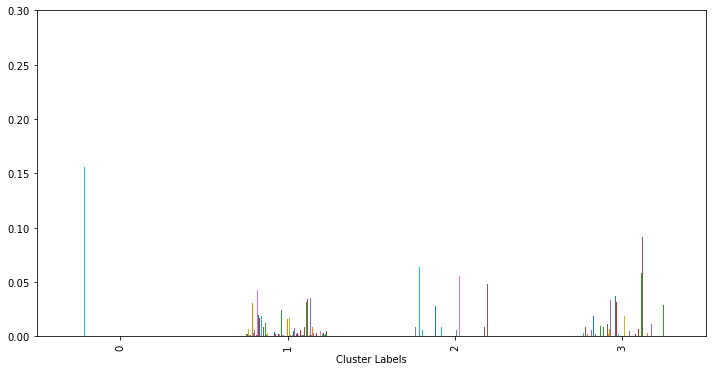

In [38]:
table = pd.pivot_table(sp_grouped_clustering_aux, aggfunc='mean', index='Cluster Labels')
table.fillna(0)
table.plot(kind='bar', figsize=(12,6), legend=None)
import matplotlib.pyplot as plt
plt.ylim(ymax = 0.3, ymin = 0)

Below we can check the composition of each cluster by type of venue in each one:

In [39]:
def printClusterComposition(df):
    qtd_clusters = df['Cluster Labels'].max() + 1
    for cluster in range(qtd_clusters):
        temp = df[df['Cluster Labels'] == cluster].mean().T
        temp.drop(['Cluster Labels'],inplace=True)
        with pd.option_context('display.max_rows', 500):
            print('Cluster {} :'.format(cluster))
            print(temp[temp>0])
            print()


In [40]:
printClusterComposition(sp_grouped_clustering_aux)

Cluster 0 :
BBQ Joint               0.100000
Bakery                  0.155556
Gaming Cafe             0.055556
Grocery Store           0.100000
Gym / Fitness Center    0.055556
Gymnastics Gym          0.155556
Pizza Place             0.266667
Soccer Field            0.055556
Supermarket             0.055556
dtype: float64

Cluster 1 :
Acai House                                  0.001272
Accessories Store                           0.000755
American Restaurant                         0.002181
Arcade                                      0.000812
Argentinian Restaurant                      0.001289
Art Gallery                                 0.002350
Art Museum                                  0.000298
Arts & Crafts Store                         0.007026
Arts & Entertainment                        0.000905
Asian Restaurant                            0.002470
Athletics & Sports                          0.001177
Auto Dealership                             0.001493
Auto Workshop              